# Ref Report Comment #4
It can be seen from Figure 5 that there is a mild degeneracy between the quenching timescale and quenching probability. The reliability of obtained quenching timescale partly relies on how well the quenching probability is constrained. Therefore, I expect the authors to compare their result of quenching probability with those derived in previous works, such as Moustakas et al. 2013, and the recent work by Lian et al. 2016. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

One issue with comparing our $P_Q$ with the "quenching rate" of Moustakas et al. (2013) is that their $\mathcal{F}_Q$ is for both *centrals* and *satellites*. So lets estimate what their $\mathcal{F}_Q^{cen}$ would be. 

Based on Moustakas et al. (2013): 

$$\mathcal{F}_Q = \frac{\mathrm{d} n_Q}{dt} \frac{1}{n_{SF}}$$. 

Then 

$$\mathcal{F}_Q^{cen} = \frac{\mathrm{d} n^{cen}_Q}{\mathrm{d}t} \frac{1}{n^{cen}_{SF}}$$

$$n^{cen}_Q = n_{SF} - f_Q^{sat} f_{sat} n_{all}$$

$$\frac{\mathrm{d} n^{cen}_Q}{\mathrm{d}t} = \frac{\mathrm{d} n_{SF}}{\mathrm{d} t} - f_Q^{sat} ( n_{all} \frac{\mathrm{d}f_{sat}}{\mathrm{d}t} - f_{sat} \frac{\mathrm{d} n_{all}}{\mathrm{d} t})$$

$$n^{cen}_{SF} = n_{all}(1-f_{sat}) - (n_{SF} - f_Q^{sat} f_{sat} n_{all})$$


In [21]:
def dt_dz(zz): 
    return -13.8835 + 19.3598 * zz - 13.621 * zz**2 + 4.2141 * zz**3

In [28]:
# from Wetzel et al. (2013)
def fsat(mstar, zz): 
    if (mstar >= 9.5 and mstar < 10.): 
        B0 = 0.33
        B1 = -0.055
    elif (mstar >= 10. and mstar < 10.5): 
        B0 = 0.3
        B1 = -0.073
    elif (mstar >= 10.5 and mstar < 11.): 
        B0 = 0.25
        B1 = -0.11
    elif (mstar >= 11. and mstar < 11.5): 
        B0 = 0.17
        B1 = -0.1
    else: 
        raise ValueError
    return B0 + B1 * zz 

def dfsat_dt(mstar, zz): 
    if (mstar >= 9.5 and mstar < 10.): 
        B0 = 0.33
        B1 = -0.055
    elif (mstar >= 10. and mstar < 10.5): 
        B0 = 0.3
        B1 = -0.073
    elif (mstar >= 10.5 and mstar < 11.): 
        B0 = 0.25
        B1 = -0.11
    elif (mstar >= 11. and mstar < 11.5): 
        B0 = 0.17
        B1 = -0.1
    else: 
        raise ValueError
    return B1 / dt_dz(zz)

In [29]:
def fQsat(mstar, zz): 
    C0 = -3.26
    C1 = 0.38
    return C0 + C1 * mstar

In [30]:
def nz(gal, mstar, zz): 
    # n(z) for all, sf, q
    if (mstar >= 9.5 and mstar < 10.): 
        n0all, n0q, n0sf = -2.441, -2.802, -2.666
        g0all, g0q, g0sf = -0.729, -3.444, 0.317
    elif (mstar >= 10. and mstar < 10.5): 
        n0all, n0q, n0sf = -2.527, -2.821, -2.830
        g0all, g0q, g0sf = -0.644, -1.668, 0.090
    elif (mstar >= 10.5 and mstar < 11.): 
        n0all, n0q, n0sf = -2.766, -2.956, -3.150
        g0all, g0q, g0sf = -0.062, -0.775, 0.245
    elif (mstar >= 11. and mstar < 11.5): 
        n0all, n0q, n0sf = -3.433, -3.534, -4.090
        g0all, g0q, g0sf = 0.148, -0.285, 1.114
    else: 
        raise ValueError
        
    if gal == 'all':
        return 10.**n0all * (1. + zz)**g0all
    elif gal == 'q':
        return 10.**n0q * (1. + zz)**g0q
    elif gal == 'sf':
        return 10.**n0sf * (1. + zz)**g0sf
    
def dnz_dt(gal, mstar, zz): 
    # n(z) for all, sf, q
    if (mstar >= 9.5 and mstar < 10.): 
        n0all, n0q, n0sf = -2.441, -2.802, -2.666
        g0all, g0q, g0sf = -0.729, -3.444, 0.317
    elif (mstar >= 10. and mstar < 10.5): 
        n0all, n0q, n0sf = -2.527, -2.821, -2.830
        g0all, g0q, g0sf = -0.644, -1.668, 0.090
    elif (mstar >= 10.5 and mstar < 11.): 
        n0all, n0q, n0sf = -2.766, -2.956, -3.150
        g0all, g0q, g0sf = -0.062, -0.775, 0.245
    elif (mstar >= 11. and mstar < 11.5): 
        n0all, n0q, n0sf = -3.433, -3.534, -4.090
        g0all, g0q, g0sf = 0.148, -0.285, 1.114
    else: 
        raise ValueError
        
    if gal == 'all':
        return (10.**n0all * g0all * (1. + zz)**(g0all - 1.)) / dt_dz(zz)
    elif gal == 'q':
        return (10.**n0q * g0q * (1. + zz)**(g0q - 1.)) / dt_dz(zz)
    elif gal == 'sf':
        return (10.**n0sf * g0sf * (1. + zz)**(g0sf - 1.)) / dt_dz(zz)

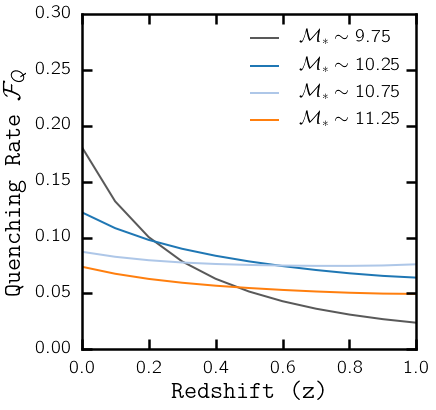

In [92]:
prettyplot()
pretty_colors = prettycolors()

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

for i_m, mm in enumerate([9.75, 10.25, 10.75, 11.25]): 
    fqing = []
    for zz in np.arange(0., 1.1, 0.1): 
        fqing.append(dnz_dt('q', mm, zz) / nz('sf', mm, zz))
    sub.plot(np.arange(0., 1.1, 0.1), fqing, 
             c=pretty_colors[i_m], lw=2, label='$\mathcal{M}_* \sim '+str(mm)+'$')
    
sub.legend(loc='upper right')
sub.set_xlim([0., 1.])
sub.set_xlabel('Redshift (z)', fontsize=25)
sub.set_ylim([0., 0.3])
sub.set_ylabel('Quenching Rate $\mathcal{F}_Q$', fontsize=25)

In [83]:
def Fqing_cen(mstar, zz): 
    dnQcen_dt = dnz_dt('q', mstar, zz) - fQsat(mstar, zz) * (
        nz('all', mstar, zz) * dfsat_dt(mstar, zz) + fsat(mstar, zz) * dnz_dt('all', mstar, zz))
    nSFcen = nz('all', mstar, zz) * (1. - fsat(mstar, zz)) - (
        nz('q', mstar, zz) - fQsat(mstar, zz) * fsat(mstar, zz) * nz('all', mstar, zz))
    return dnQcen_dt / nSFcen

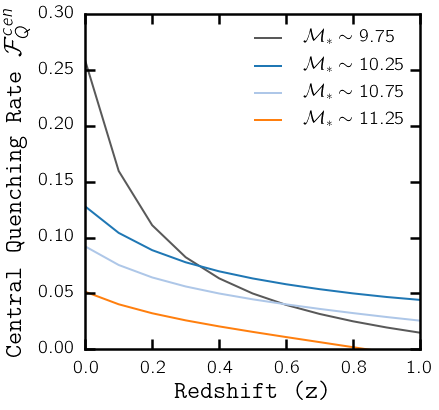

In [90]:
prettyplot()
pretty_colors = prettycolors()

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

for i_m, mm in enumerate([9.75, 10.25, 10.75, 11.25]): 
    fqingcen = []
    for zz in np.arange(0., 1.1, 0.1): 
        fqingcen.append(Fqing_cen(mm, zz))
    sub.plot(np.arange(0., 1.1, 0.1), fqingcen, 
             c=pretty_colors[i_m], lw=2, label='$\mathcal{M}_* \sim '+str(mm)+'$')
    
sub.legend(loc='upper right')
sub.set_xlim([0., 1.])
sub.set_xlabel('Redshift (z)', fontsize=25)
sub.set_ylim([0., 0.3])
sub.set_ylabel('Central Quenching Rate $\mathcal{F}_Q^{cen}$', fontsize=25)

In [57]:
from gal_prop import Fq

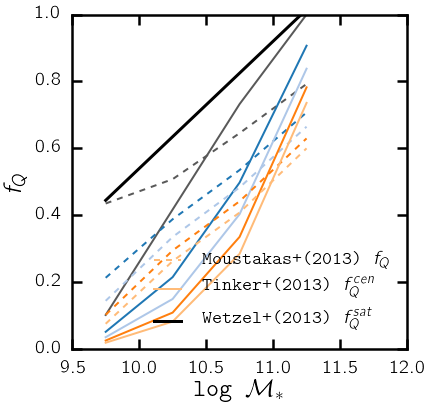

In [77]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

m_arr = np.arange(9.75, 11.75, 0.5)

qf = Fq()

for i_z, zi in enumerate([0., 0.3, 0.5, 0.7, 0.9]): 
    m2013_label = None
    if zi == 0.9: 
        m2013_label = 'Moustakas+(2013) $f_{Q}$'
    sub.plot(m_arr, [nz('q', m_i, zi)/nz('all', m_i, zi) for m_i in m_arr], 
                c=pretty_colors[i_z], ls='--', lw=2, label=m2013_label)
    tinker_label = None
    if zi == 0.9: 
        tinker_label = 'Tinker+(2013) $f^{cen}_{Q}$'
    sub.plot(m_arr, qf.model(m_arr, zi, 'cosmos_tinker'), 
             c=pretty_colors[i_z], lw=2, label=tinker_label)
sub.plot(m_arr, fQsat(m_arr, 0.1), c='k', lw=3, label='Wetzel+(2013) $f_Q^{sat}$')
sub.legend(loc='lower right')
sub.set_xlim([9.5, 12.])
sub.set_xlabel('log $\mathcal{M}_*$', fontsize=25)
sub.set_ylim([0., 1.])
sub.set_ylabel('$f_{Q}$', fontsize=25)

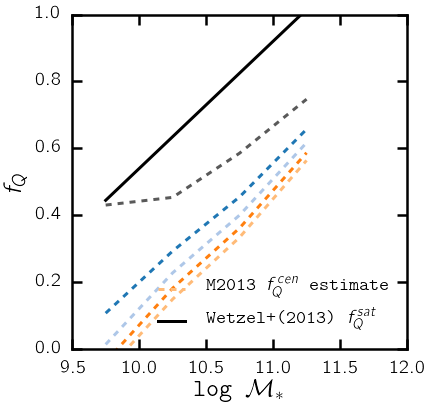

In [78]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

m_arr = np.arange(9.75, 11.75, 0.5)
for i_z, zi in enumerate([0., 0.3, 0.5, 0.7, 0.9]): 
    m2013_label = None
    if zi == 0.9: 
        m2013_label = 'M2013 $f^{cen}_{Q}$ estimate'
        
    fQ_cen = [(nz('q', m_i, zi) - fQsat(m_i, zi) * fsat(m_i, zi) * nz('all', m_i, zi))/((1. - fsat(m_i, zi)) * nz('all', m_i, zi)) 
              for m_i in m_arr]

    sub.plot(m_arr, fQ_cen, c=pretty_colors[i_z], ls='--', lw=3, label=m2013_label)
    
sub.plot(m_arr, fQsat(m_arr, 0.1), c='k', lw=3, label='Wetzel+(2013) $f_Q^{sat}$')
sub.legend(loc='lower right')
sub.set_xlim([9.5, 12.])
sub.set_xlabel('log $\mathcal{M}_*$', fontsize=25)
sub.set_ylim([0., 1.])
sub.set_ylabel('$f_{Q}$', fontsize=25)